## 7-8. 프로젝트 : 나랑 닮은 연예인을 찾아보자



### Step1. 사진 모으기
* 내 사진을 2장 이상 포함합시다.
* 슬랙에서 다운 받은 사진과 구글에서 크롤링한 사진을 함께 데이터셋으로 사용함. 

In [14]:
# 필요한 라이브러리를 한 곳에
import face_recognition
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

### Step2. 얼굴 영역 자르기

In [15]:
# 얼굴이미지 crop함수
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]    
    return cropped_face


#### 이미지 데이터셋 크롭 후 저장

*  Step1.에서 찾은 이미지들을 이전에 만들었던 get_gropped_face(image_file)로 crop

In [16]:
# 모은 이미지 얼굴 추출해서 다른 폴더에 저장 
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/e_images/'
file_list = os.listdir(dir_path)
file_list.sort()


In [17]:
face_image_path = os.getenv('HOME')+'/aiffel/face_embedding/e_images_face/'

for file in file_list:
    img_path = os.path.join(dir_path, file)
    face = get_gropped_face(img_path)
    path_to_save = os.path.join(face_image_path, file)
    pillow_image = Image.fromarray(face)
    pillow_image.save(path_to_save)

#### 내 사진 크롭 후 저장

In [18]:
# 내 이미지 얼굴 추출해서 다른 폴더에 저장 
dir_path_me = os.getenv('HOME')+'/aiffel/face_embedding/me/'
file_list_me = os.listdir(dir_path_me)
file_list_me.sort()

face_image_path_me = os.getenv('HOME')+'/aiffel/face_embedding/me_face/'

for file in file_list_me:
    img_path = os.path.join(dir_path_me, file)
    face = get_gropped_face(img_path)
    path_to_save = os.path.join(face_image_path_me, file)
    pillow_image = Image.fromarray(face)
    pillow_image.save(path_to_save)

### Step3. 얼굴 영역의 임베딩 추출하기
* def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
* def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [19]:
# e_images 디렉토리 안에 있는 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하기
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:# 얼굴 영역 face가 제대로 detect되지 않으면 발생 할 수 있는 경우
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    
    return embedding_dict

In [20]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [21]:
#임베딩 동작 테스트 
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/me_face/'

image_file = os.path.join(dir_path, 'sunny.jpg')
face =  get_gropped_face(image_file)


def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)
embedding

[array([-4.05810177e-02,  8.95428881e-02,  3.97686772e-02, -9.38266069e-02,
        -1.82229742e-01, -1.25173777e-02, -7.68463910e-02, -1.36670217e-01,
         1.24266922e-01, -1.86761454e-01,  1.53889105e-01, -2.36413851e-02,
        -1.75950527e-01,  6.33859187e-02, -7.22719431e-02,  1.71385914e-01,
        -1.97084591e-01, -1.43522948e-01, -6.70286566e-02, -3.56369466e-03,
        -1.86687335e-04,  1.04785644e-01,  5.12073040e-02,  6.22688234e-03,
        -8.43183622e-02, -3.00895512e-01, -6.18881881e-02, -4.80337441e-02,
         3.68429162e-02, -2.86628790e-02, -7.27312341e-02,  6.48039728e-02,
        -1.51159853e-01,  4.02912498e-02,  4.97971512e-02,  1.22057840e-01,
        -2.88246572e-02, -6.95139766e-02,  1.47056878e-01,  2.54924782e-02,
        -3.08954358e-01,  7.34676570e-02,  2.00255439e-02,  2.34874234e-01,
         2.13064253e-01, -3.16310897e-02,  4.49539721e-03, -2.23058075e-01,
         1.38061434e-01, -1.90096036e-01,  5.56298830e-02,  1.35228008e-01,
        -1.3

In [22]:
dir_path = dir_path = os.getenv('HOME')+'/aiffel/face_embedding/e_images/'
file_list = os.listdir(dir_path)
embedding_dict = get_face_embedding_dict(dir_path)

In [23]:
embedding_dict['me']

array([-0.04527725,  0.12373959,  0.01712358, -0.06929075, -0.17921755,
        0.0016605 , -0.09441949, -0.11982369,  0.16287635, -0.15654907,
        0.15690199, -0.05571819, -0.21289641,  0.08243331, -0.11193717,
        0.18285459, -0.16045624, -0.15468433, -0.01233856,  0.01732335,
        0.01995913,  0.09837787,  0.02788163,  0.0184098 , -0.10035101,
       -0.33871868, -0.06654333, -0.00861511, -0.02338376, -0.01814912,
       -0.02662081,  0.16123715, -0.0955584 ,  0.07496166,  0.06621633,
        0.09250525, -0.00451241, -0.08425379,  0.19287482,  0.01104143,
       -0.3230688 ,  0.0573876 ,  0.02006634,  0.28385359,  0.17595854,
       -0.08048683,  0.01359707, -0.17529362,  0.11428597, -0.18986565,
        0.00900299,  0.18883818,  0.02224084,  0.02315649, -0.01518287,
       -0.12831569,  0.01790713,  0.11068079, -0.11786857, -0.06836854,
        0.10997664, -0.01796084,  0.02745795, -0.15298089,  0.22208895,
        0.13004702, -0.12653673, -0.20808446,  0.13212705, -0.16

### Step4. 모은 연예인들과 비교하기
*  get_nearest_face(name, top=5) 함수들을 응용하면 손쉽게 수행 가능합니다.

In [24]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('me', '김고은')

0.5463497642972147

In [25]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('me')
sort_key_func('김고은')

0.5463497642972147

In [26]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('me',
  array([-0.04527725,  0.12373959,  0.01712358, -0.06929075, -0.17921755,
          0.0016605 , -0.09441949, -0.11982369,  0.16287635, -0.15654907,
          0.15690199, -0.05571819, -0.21289641,  0.08243331, -0.11193717,
          0.18285459, -0.16045624, -0.15468433, -0.01233856,  0.01732335,
          0.01995913,  0.09837787,  0.02788163,  0.0184098 , -0.10035101,
         -0.33871868, -0.06654333, -0.00861511, -0.02338376, -0.01814912,
         -0.02662081,  0.16123715, -0.0955584 ,  0.07496166,  0.06621633,
          0.09250525, -0.00451241, -0.08425379,  0.19287482,  0.01104143,
         -0.3230688 ,  0.0573876 ,  0.02006634,  0.28385359,  0.17595854,
         -0.08048683,  0.01359707, -0.17529362,  0.11428597, -0.18986565,
          0.00900299,  0.18883818,  0.02224084,  0.02315649, -0.01518287,
         -0.12831569,  0.01790713,  0.11068079, -0.11786857, -0.06836854,
          0.10997664, -0.01796084,  0.02745795, -0.15298089,  0.22208895,
          0.13004702, -0.12653

In [27]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top):
        if i == 0:continue
        if sorted_faces[i]:
            print('순위 {}: 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
        

In [28]:
get_nearest_face('me', top=10)

순위 1: 이름(서윤선), 거리(0.3189939724404294)
순위 2: 이름(나인뮤지스경리), 거리(0.4616440239474835)
순위 3: 이름(윤아), 거리(0.46454564143456034)
순위 4: 이름(우기), 거리(0.4798060667571779)
순위 5: 이름(강미나), 거리(0.49190390301591563)
순위 6: 이름(지호), 거리(0.49588166784522725)
순위 7: 이름(러블리즈예인), 거리(0.5058019918743599)
순위 8: 이름(채연), 거리(0.5083833037664928)
순위 9: 이름(온앤오프라운), 거리(0.5089069120896194)


### 나는 '나'와 가까우며 연예인 중 '경리'랑 닮았다.

* 순위 1: 이름(서윤선), 거리(0.3189939724404294)
* 순위 2: 이름(나인뮤지스경리), 거리(0.4616440239474835)
* 순위 3: 이름(윤아), 거리(0.46454564143456034)
* 순위 4: 이름(우기), 거리(0.4798060667571779)
* 순위 5: 이름(강미나), 거리(0.49190390301591563)
* 순위 6: 이름(지호), 거리(0.49588166784522725)
* 순위 7: 이름(러블리즈예인), 거리(0.5058019918743599)
* 순위 8: 이름(채연), 거리(0.5083833037664928)
* 순위 9: 이름(온앤오프라운), 거리(0.5089069120896194)


### Step5. 다양한 재미있는 시각화 시도해 보기


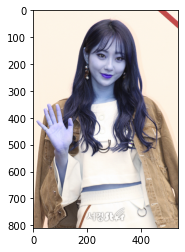

In [29]:
import os #운영체제 관련 함수 호출 (디렉토리 경로에서 이미지를 불러오기 위해)
import cv2 # 컴퓨터 비젼 라이브러리 버젼2
import matplotlib.pyplot as plt #opencv 와 노트북에 이미지를 출력하기 위한 matplotlib를 읽어옵니다.
import numpy as np
import dlib # face detecting 라이브러리

#나인뮤지스경리
image_path = os.getenv('HOME')+'/aiffel/face_embedding/e_images/나인뮤지스경리.jpg' 

img_bgr = cv2.imread(image_path)    #- OpenCV로 이미지를 읽어서
#img_bgr = cv2.resize(img_bgr, (828,1062))    # 해상도 별도 조정없이 원본을 그대로 씀. 조정해서 해 봤으나, 좌표 설정이 더 어려워서, 큰 싸이즈의 사진으로 함.
img_show = img_bgr.copy() #- 출력 테스트 용 이미지 
plt.imshow(img_bgr)
plt.show()

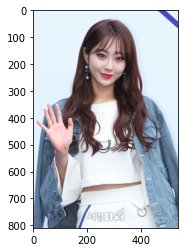

In [30]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)#opencv 의 bgr 이미지를 rgb로 변환
plt.imshow(img_rgb)
plt.show()

In [31]:
print([a for a in dir(dlib) if 'get_' in a]) #  어떤 함수가 제공되나 탐색
#https://hayunjong83.tistory.com/38
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
#img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #위에서 해서, 다시 변환 할 필요 없음.

dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)# 찾은 얼굴영역 좌표

['get_face_chip', 'get_face_chip_details', 'get_face_chips', 'get_frontal_face_detector', 'get_histogram', 'get_rect']
rectangles[[(201, 133) (356, 288)]]


[(201, 133) (356, 288)]


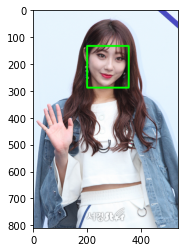

In [32]:
for dlib_rect in dlib_rects:
    print(dlib_rect)
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 5, lineType=cv2.LINE_8) 

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [33]:
# landmark 모델 불러오기
model_path = os.getenv("HOME")+"/aiffel/e3.camera_sticker/models/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

In [34]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0][0]))# 68개의 랜드마크
print(list_landmarks[0][0][0])
print(list_landmarks[0][0][1])

2
209
160


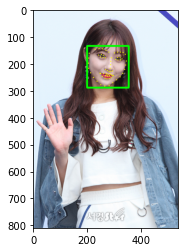

In [35]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [36]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0] #- 스티커 위치의 초기 기준점
    y = landmark[30][1] 
    
    w = int((landmark[30][0]  - landmark[36][0]) * 2.1)  #: 왼쪽 눈끝
    h = int((landmark[48][1]  - landmark[2][1])  * 2.1)   # 왼쪽 입끝을 기준으로 고양이 수염 이미지의 크기를 맞춤
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    

(287, 216)
(x,y) : (287,216)
(w,h) : (90,77)


In [37]:
sticker_path = os.getenv('HOME')+'/aiffel/e3.camera_sticker/images/cat2.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h//1))
print (img_sticker.shape)

(77, 90, 3)


In [38]:
refined_x = x - w // 2  # left 위에서 다 계산 함.
refined_y = (int(y - h*0.5)) #수염이 붙을 곳의 높이 조절
print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) # 음수값이 아니므로, 이미지 crop 안 함.

(x,y) : (242,177)


In [39]:
x_shape = img_sticker.shape[0]
y_shape = img_sticker.shape[1]
print ('(x,y) : (%d,%d)'%(x_shape,y_shape))
print ('(x,y) : (%d,%d)'%(refined_x,refined_x))

(x,y) : (77,90)
(x,y) : (242,242)


In [40]:
print(img_show.shape)
sticker_area = img_show[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape]
print(sticker_area.shape)


img_show[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

(810, 540, 3)
(77, 90, 3)


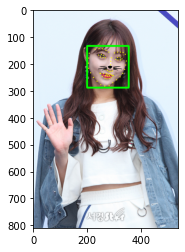

In [41]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

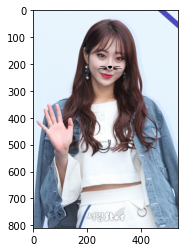

In [42]:
sticker_area = img_bgr[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape]

img_bgr[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 총평

##### FLASK : 웹서비스화 하는 프레임워크, tkinter  : ui 화 프레임워크둘다 현재 학습 과정에서 습득된 지식은 아니어서 처음 배웠던 고양이 수염 스티커를 나와 닮은 연예인 '경리'에게 붙여 주었다.

----

### 루브릭 요건 
#### 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다. 
#### 다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.
#### matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다. 